In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

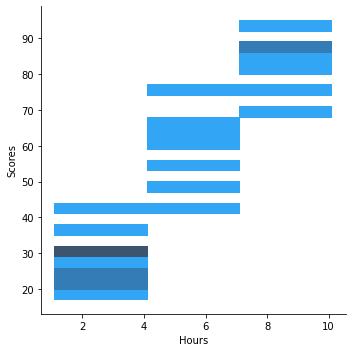

In [5]:
sns.displot(df, x="Hours",y='Scores', binwidth=3)


In [6]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [7]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

In [9]:
linreg = LinearRegression()

In [10]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred = linreg.predict(x_test)

In [12]:
print(y_test)
print(y_pred)

[20 27 69 30 62 35 24]
[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [13]:
from sklearn.svm import LinearSVR


In [14]:
svm_reg = LinearSVR(epsilon=15)
svm_reg.fit(x_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=15, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [15]:
y_predd = svm_reg.predict(x_test)

In [16]:
print(y_predd)
print(y_test)

[14.56095538 29.76198375 67.31746558 23.50273677 53.9047935  35.12705258
 18.13766794]
[20 27 69 30 62 35 24]


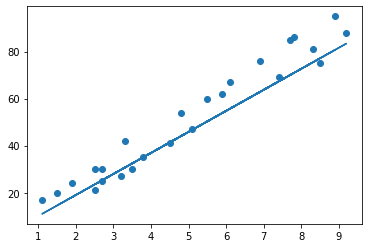

In [17]:
# Plotting the regression line
line = svm_reg.coef_*X+svm_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

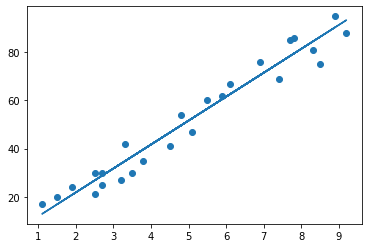

In [18]:
line = linreg.coef_*X+linreg.intercept_

# Plotting for the test data
plt.scatter(X,y)
plt.plot(X, line);
plt.show()

In [19]:
from sklearn import metrics  
print('Mean Absolute Error for Linear Regression:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error for Linear Regression: 4.130879918502482


In [20]:
from sklearn import metrics  
print('Mean Absolute Error for Support Vector Machine Regressor:', 
      metrics.mean_absolute_error(y_test, y_predd)) 

Mean Absolute Error for Support Vector Machine Regressor: 4.352202450062789


In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

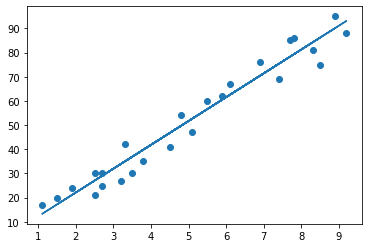

In [22]:
line = ridge_reg.coef_*X+ridge_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [23]:
y_preddd = ridge_reg.predict(x_test)

In [24]:
print('Mean Absolute Error for Ridge Regression:', 
      metrics.mean_absolute_error(y_test, y_preddd)) 

Mean Absolute Error for Ridge Regression: 4.026292924740875


In [32]:
data = {'Linear Regressor':4.130879918502482,'Support Vector Machine Regressor':4.352202450062789,'Ridge Regressor':4.026292924740875}
models = list(data.keys())
values = list(data.values())

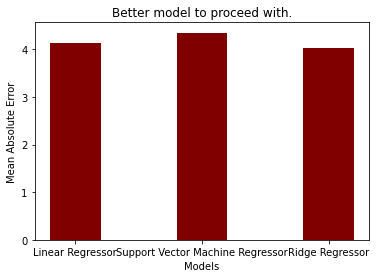

In [34]:
plt.bar(models, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("Better model to proceed with.")
plt.show()

In [35]:
hours = 9.25
arr = np.array(hours)
own_pred = ridge_reg.predict(arr.reshape(1,-1))
print("No of Hours = {}".format(arr))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.554523659306
